# BERT base uncased
## Paper

# DEV datasets
### HypeNet - DEV
 - 49475 pares
    - True: 20.095% - 9942
    - False: 79.905% - 39533

In [1]:
# imports
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import pandas as pd
import numpy as np
sys.path.append("/home/gabrielescobar/hyper_bert")
import nb_utils
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
vocabs = ["../../vocabs/wikipedia15M/vocab.txt",
          "../../vocabs/wikipedia30M/vocab.txt",
          "../../vocabs/wikipedia60M/vocab.txt",
          "../../vocabs/wikipedia120M/vocab.txt",
          "../../vocabs/wikipedia240M/vocab.txt"]

local = False

In [2]:
# server
# bert DEV en
if local:
    path_file_bert = "../../en-model/bert-base-uncased_bert_score_2020-11-11_20:24:14_HypeNet_train/HypeNet_train.json"
else:
    path_file_bert = "../../en-model/bert-base-uncased_bert_score_2020-11-11_20:24:14_HypeNet_train/HypeNet_train.json"

json_data = json.load(open(path_file_bert))
df_with_oov = nb_utils.create_dataframe(json_data, separator="\t")
pattern_unique = df_with_oov['pattern'].unique().tolist()
len_total_unique = df_with_oov['len_total'].unique().tolist()

#local random
path_file_random = "../../en-model/bert-base-uncased_bert_score_2021-01-26_20:58:01/ENrandom.json"
df_random = nb_utils.create_dataframe(json.load(open(path_file_random)), separator="\t")
max_pair_length = df_with_oov[df_with_oov.pattern == pattern_unique[0]]['len_total'].value_counts().max()

print(f"Número máximo de pares por comprimento= {max_pair_length}")
print(f"DF all with OOV = {df_with_oov[df_with_oov['pattern'] == pattern_unique[0]].count()['hiponimo']}")

# df com oov e random logz
# df_with_oov_random_logz = nb_utils.logsumexp_random_logZ(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length)

# df com oov
df_with_oov = nb_utils.logsumexp_normalization(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique)



Número máximo de pares por comprimento= 13019
DF all with OOV = 49475


### DEV - inglês
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Quantidade de pares por comprimento

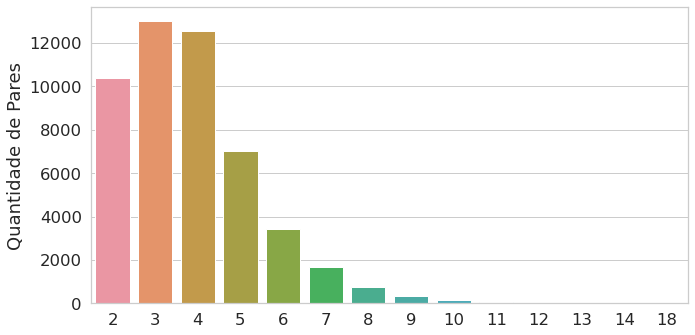

In [3]:
# Balanceamento quantidade de pares por comprimento
# Balanceamento df_with_oov
# sns.set(font_scale=1.5)
sns.set(style="whitegrid", font_scale=1.5)


plt.figure(figsize=(10, 5))
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)
df_with_oov_ratio['total'] = df_with_oov_ratio['true'] + df_with_oov_ratio['false']
ax = sns.barplot(x="len_total", y="total", data=df_with_oov_ratio)
ax.set(xlabel="")
# ax.set_title(f"Number of pairs")
ax.set(ylabel="Quantidade de Pares")
plt.savefig('DEV_numero_de_pares_por_comprimento_dataset_ingles.pdf')
plt.show()



### DEV - inglês
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
 - Legenda: Número de pares positivo para cada comprimento do par

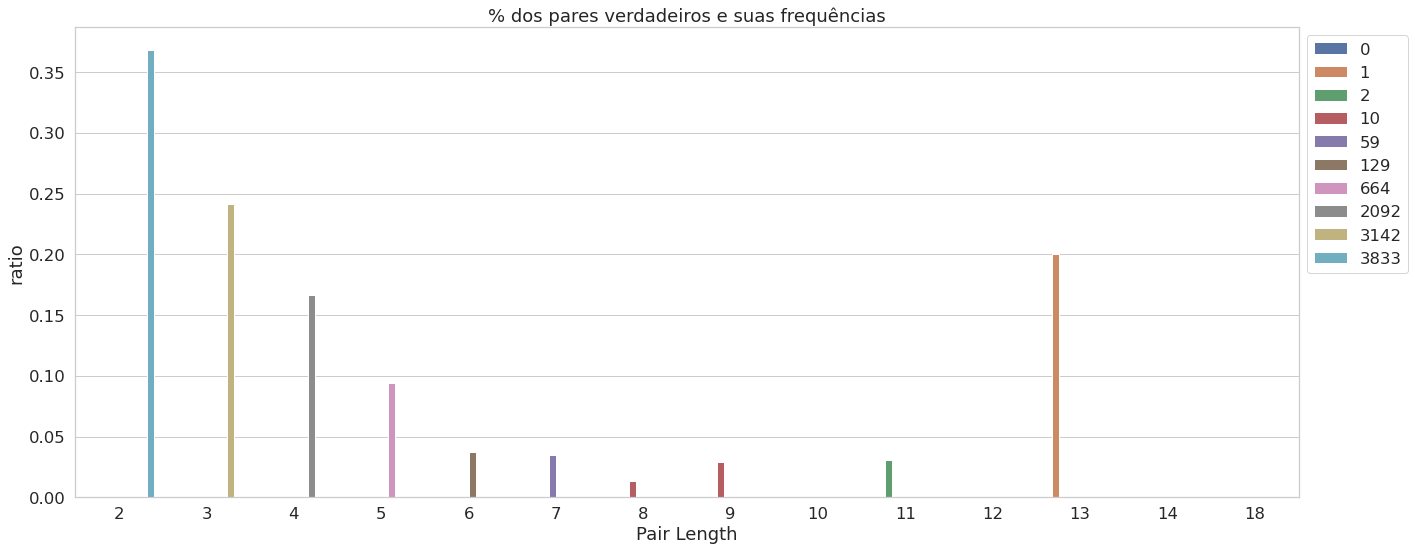

In [4]:
# Balanceamento DEV en
# Balanceamento df_with_oov
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_with_oov_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

No handles with labels found to put in legend.


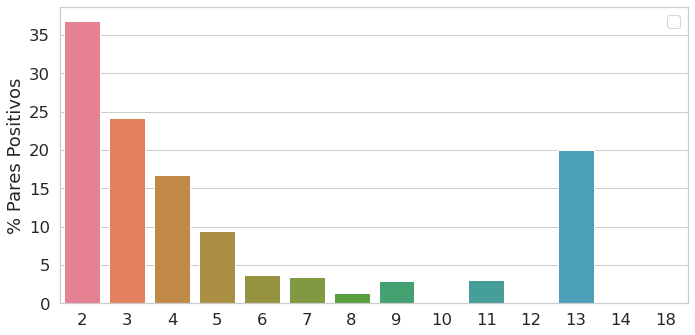

In [5]:
# Balanceamento DEV en - mostrar apenas a porcentagem dos pares positivos
# Balanceamento df_with_oov
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)
plt.figure(figsize=(10, 5))
df_with_oov_ratio['ratio'] = df_with_oov_ratio['ratio'] * 100
ax = sns.barplot(x="len_total", y="ratio", data=df_with_oov_ratio, palette=sns.color_palette("husl", 18))
ax.set(xlabel="")
ax.set(ylabel="% Pares Positivos")
# ax.set(xlabel="Pair Length")
# ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('EN_DEV_ALL_porcentangem_pares_positivos_cada_comprimento.pdf')

plt.show()

### DEV - inglês
#### AP por padrão. Usado para selecionar os melhores padrões
#### Score é BERT - Log(Z)

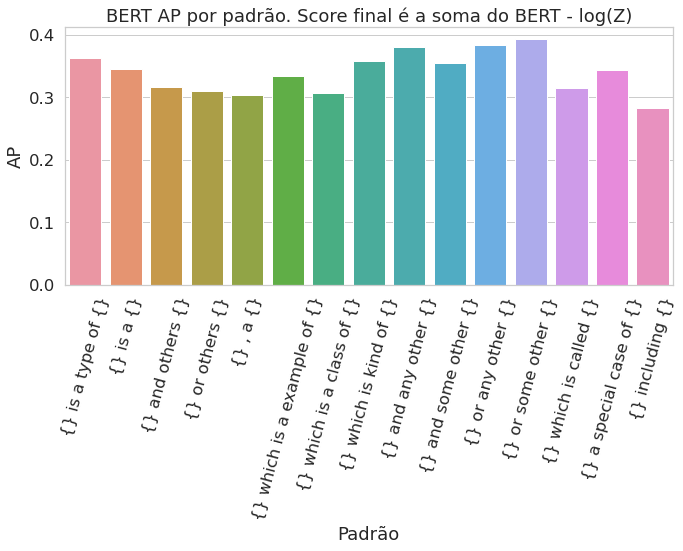

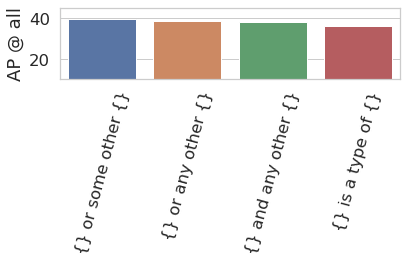

Melhores padrões usando BERT - log(Z)
['{} or some other {}', '{} or any other {}', '{} and any other {}', '{} is a type of {}', '{} which is kind of {}', '{} and some other {}', '{} is a {}', '{} a special case of {}', '{} which is a example of {}', '{} and others {}', '{} which is called {}', '{} or others {}', '{} which is a class of {}', '{} , a {}', '{} including {}']


In [6]:
# AP por padrao DEV en
# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_with_oov, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

plt.figure()
df_dissertacao = df_plot.sort_values(by="AP", ascending=False)
df_dissertacao = df_dissertacao.iloc[:4]
df_dissertacao['AP'] = df_dissertacao['AP'] * 100
ax = sns.barplot(data=df_dissertacao, x='padrao', y='AP')
ax.set(ylim=(10, 45))
ax.set(xlabel="")
ax.set(ylabel="AP @ all")
# ax.set_title(f"BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.savefig('DEV_EN_4_melhores_padroes.pdf')

plt.show()


print(f"Melhores padrões usando BERT - log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)

### DEV - inglês
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)


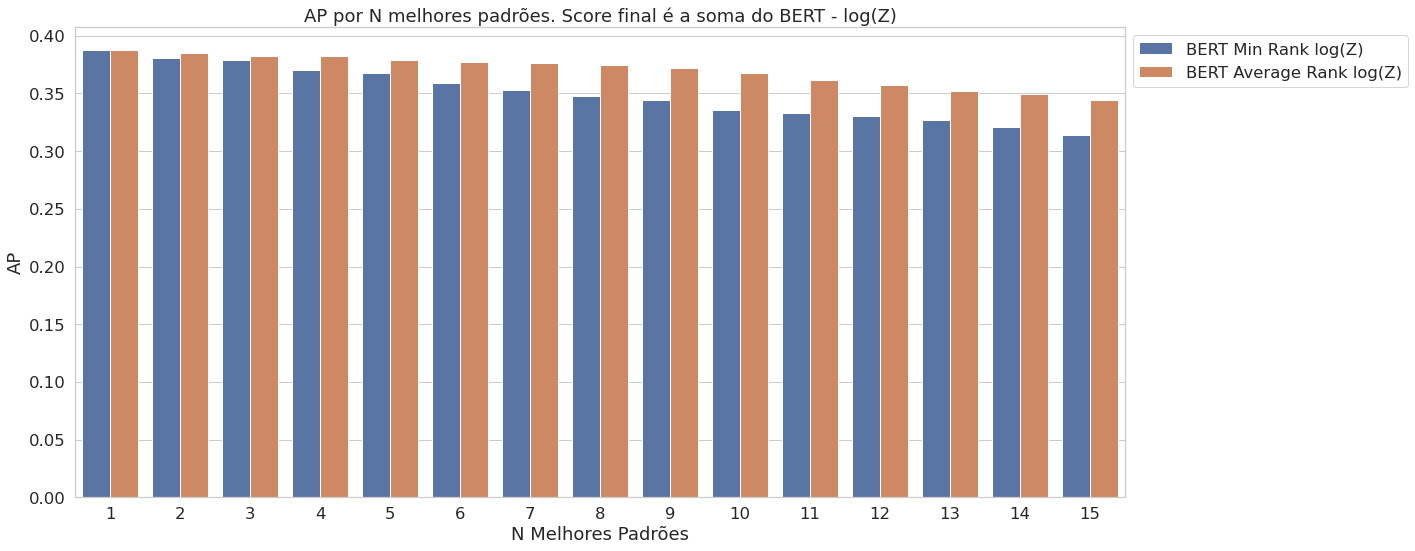

In [7]:
# AP por N melhores padroes DEV EN
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### DEV - Inglês
#### Dados do gráfico acima, para visualização em números

In [8]:
# Dados dos gŕaficos acima.
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
1               1  mean score_final_log(z)  0.388062  BERT Average Rank log(Z)
3               2  mean score_final_log(z)  0.385261  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.382827  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.382101  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
0               1  min score_final_log(z)  0.388062  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.381060  BERT Min Rank log(Z)
4               3  min score_final_log(z)  0.379230  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.370547  BERT Min Rank log(Z)


### DEV - inglês - random LogZ
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)


In [9]:
# AP por N melhores padroes DEV EN - randomLogZ
# AP por n-rank
# df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov_random_logz, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
# df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
# plt.figure(figsize=(20, 8))
# ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
# ax.set(xlabel="N Melhores Padrões")
# ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
# ax.legend(bbox_to_anchor=(1, 1))
# plt.show()

### DEV - Inglês - random LogZ
#### Dados do gráfico acima, para visualização em números

In [10]:
# Dados dos gŕaficos acima.
# df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
# df_mean = df_mean.sort_values(by='AP', ascending=False)
# print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
# print(df_mean.iloc[:4])

# print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
# df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
# df_min = df_min.sort_values(by='AP', ascending=False)
# print(df_min.iloc[:4])

In [11]:
# Balanceamento true/false
# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

         true        false  total
0  9942.00000  39533.00000  49475
1     0.20095      0.79905      1


In [12]:
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path

----------------

# Datasets Test - 10 datasets em inglês
### Usando os 1 melhores padrões do HypeNet-train

In [13]:
# processo demorado
path_json_normal = "../../en-model/bert-base-uncased_bert_score_normal_2020-11-12_15:13:01"

dfs = {}
pattern_unique = {}
filename = ""
for filename in os.listdir(path_json_normal):
    if os.path.isfile(os.path.join(path_json_normal, filename)) and filename.endswith(".json"):
        df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_normal, filename))), combination=False, separator="\t")
        df['tipo'] = 'normal'
        dfs[filename + " normal"] = df
pattern_unique['normal'] = df['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
pattern_unique = pattern_unique['normal']

df_ratios = []
for dataset_name in dfs.keys():
    print(dataset_name)
    dname, type_dataset = dataset_name.split()
    df_ratio = nb_utils.balanceamento(dfs[dataset_name], len_size=len_total_unique, patterns=pattern_unique)
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = type_dataset
    df_ratios.append(df_ratio)
df_ratios = pd.concat(df_ratios, ignore_index=True)

dfs2 = {}
for dataset_name, df in dfs.items():
    dname, type_dataset = dataset_name.split()
    max_pair_length = df[df.pattern == pattern_unique[0]]['len_total'].value_counts().max()   
    dfs2[dname + " logZ"] = nb_utils.logsumexp_normalization(df, len_list=len_total_unique, pattern_list=pattern_unique)
    dfs2[dname + " randomlogZ"] = None
#     dfs2[dname + " randomlogZ"] = nb_utils.logsumexp_random_logZ(df, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length)

dfs = dfs2
del dfs2

print("Processamento pronto")

wordnet_test.json normal
Balanceamento: [1, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
baroni2012.json normal
Balanceamento: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
HypeNet_test.json normal
Balanceamento: [1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
Weeds.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
kotlerman2010.json normal
Balanceamento: [1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
EVALution.json normal
Balanceamento: [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
LenciBenotto.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no da

### Test - inglês 10 datasets
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização


/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 1080x576 with 0 Axes>

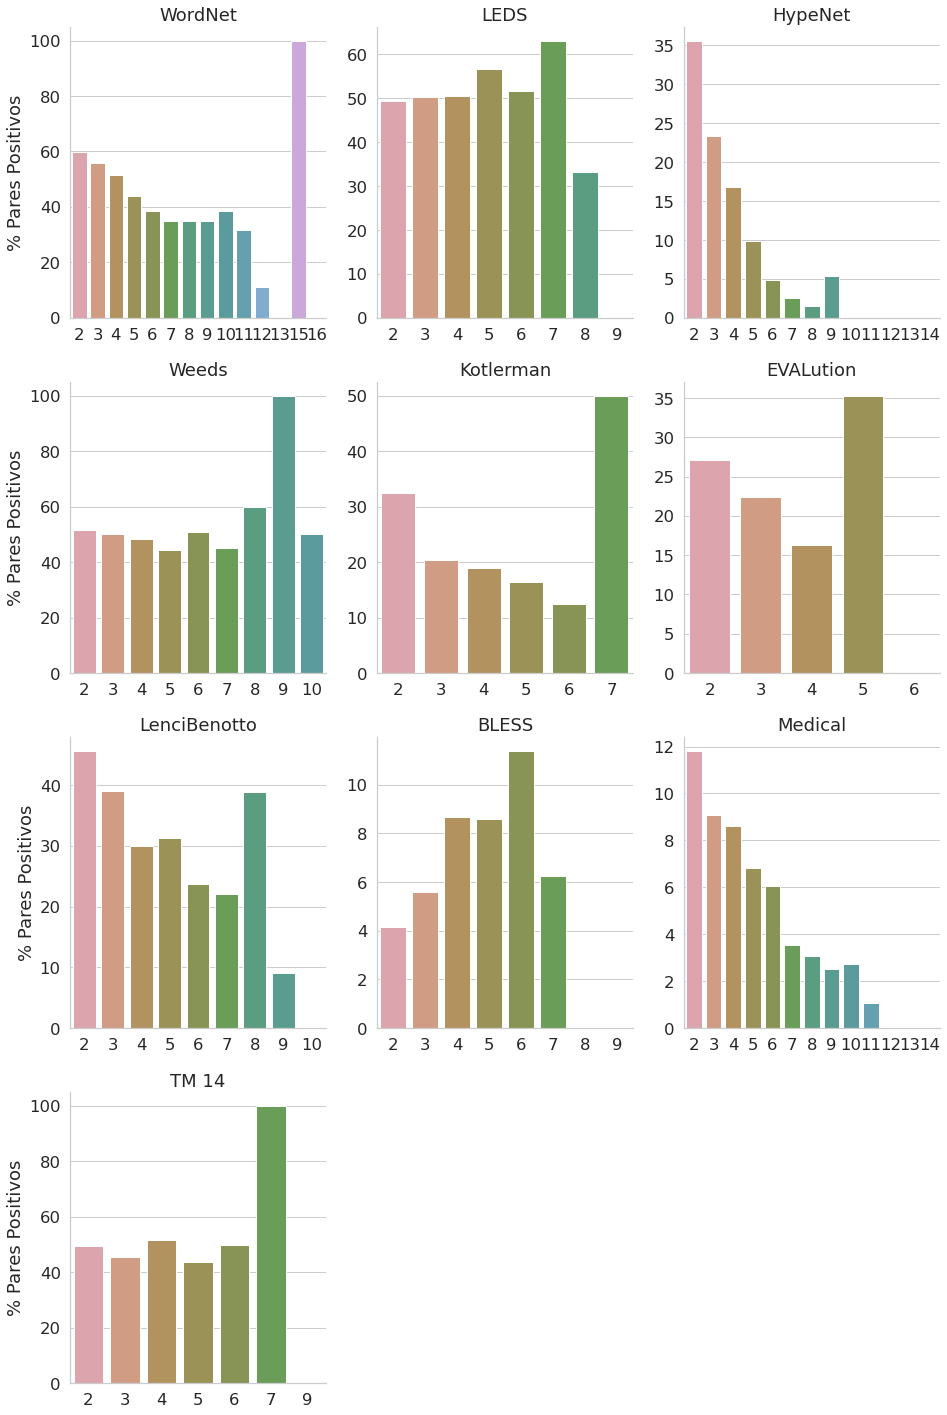

In [14]:
df_ratios['dataset_format'] = df_ratios['dataset'].map(nb_utils.get_dataset_names())
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Balanceamento true/false por comprimento de par
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(15,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_format", col_wrap=3,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False, sharex=False)
(g.set_axis_labels("", "% Pares Positivos")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('datasets_ingles_porcentangem_pares_positivos_cada_comprimento.pdf')

# _ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_true_por_subtoken.png', dpi=300)

### Test - inglês 10 datasets
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Número de pares para cada comprimento de par
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 432x288 with 0 Axes>

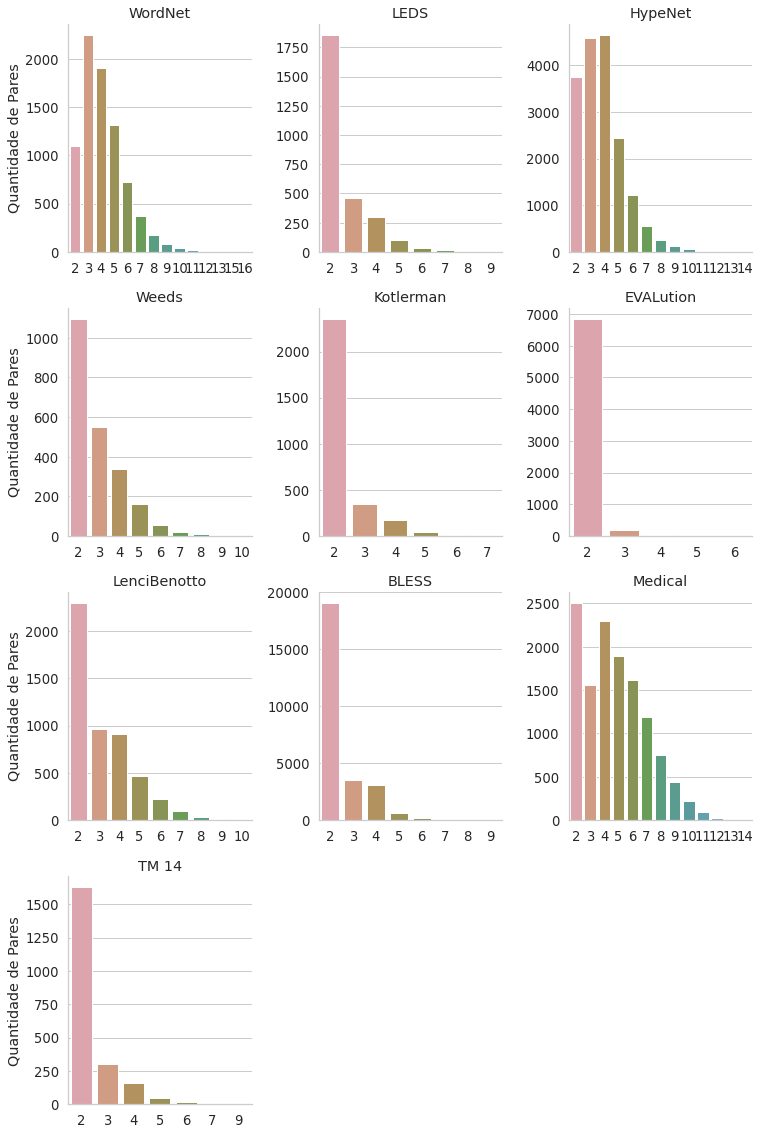

In [15]:
# Balanceamento número de pares por comprimento do par
# Quantidade de pares por tamanho de subtoken
# plt.tight_layout()

plt.figure()
sns.set(font_scale=1.2, style="whitegrid")
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']

g = sns.catplot(x="len_total", y="total", col="dataset_format", col_wrap=3,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", height=4.0, ci=None, aspect=.9, sharey=False, sharex=False)
(g.set_axis_labels("", "Quantidade de Pares")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('numero_de_pares_dataset_ingles.pdf')

# _ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

In [16]:
df_en = []
dfs2 = []
best_pattern_train = nb_utils.best_pattern_HypeNet_train_logz

# seleciona o número de melhores pares para calcular o AP
best_pattern_num_train = 4
for count_best_pattern in range(1, best_pattern_num_train + 1):
    for dataset_name in dfs.keys():
        dname, type_dataset = dataset_name.split()
        # type_dataset == 'logZ' or 'randomLogZ'
        if type_dataset == 'logZ':
            df_temp= nb_utils.compute_min_mean_ap_normal(dfs[dataset_name],
                pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=count_best_pattern)
            df_temp['tipo'] = type_dataset
            df_temp['pattern_num'] = count_best_pattern
            dfs2.append(df_temp)
            df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
                                                    best_pattern_num=count_best_pattern, tipo='normal')
            df_temp['tipo'] = "normal"
            df_temp['pattern_num'] = count_best_pattern
            dfs2.append(df_temp)
df_en = pd.concat(dfs2)

### Test
### AP para cada método (BERT, DIVE e Word2vec)
#### Usando BERT - Log(Z) e BERT - Log(Z) random pairs

 - BERT com e sem Log(Z)
 - Ordem dos algoritmo na legenda:
    - BERT Min rank Log(Z)
    - BERT Average rank Log(Z)
    - BERT Min rank
    - BERT Average rank
    - BERT Min rank Log(Z) - Random pairs
    - BERT Average rank Log(Z) - Random pairs
    - Word2vec C
    - DIVE DeltaS * C


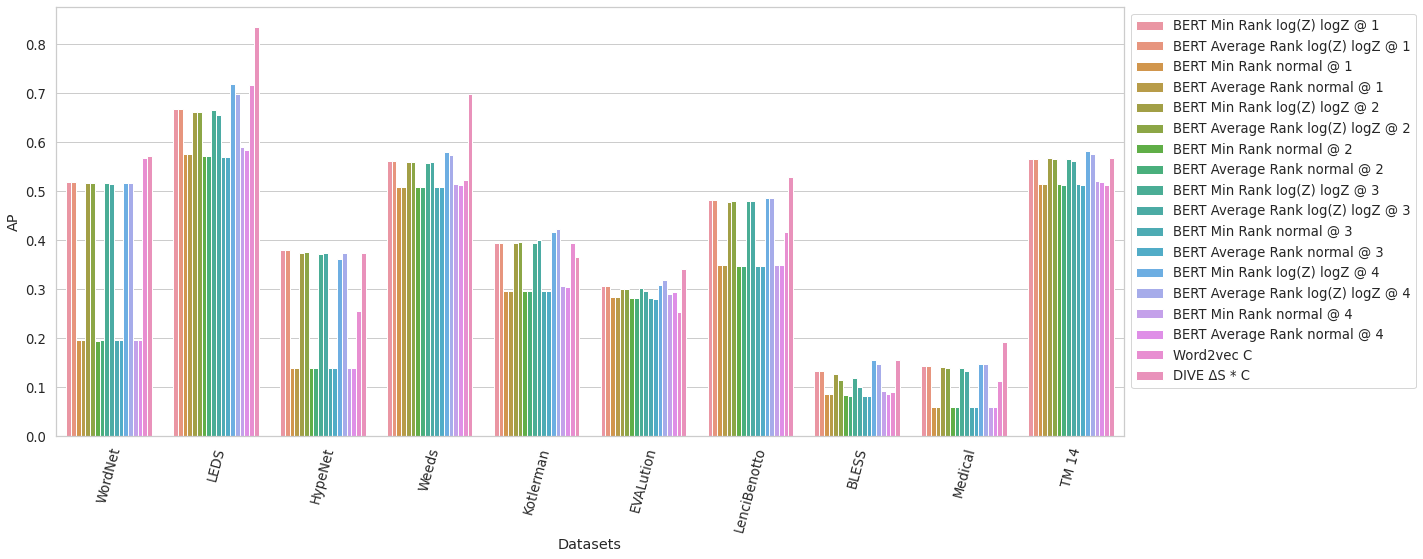

<Figure size 1440x576 with 0 Axes>

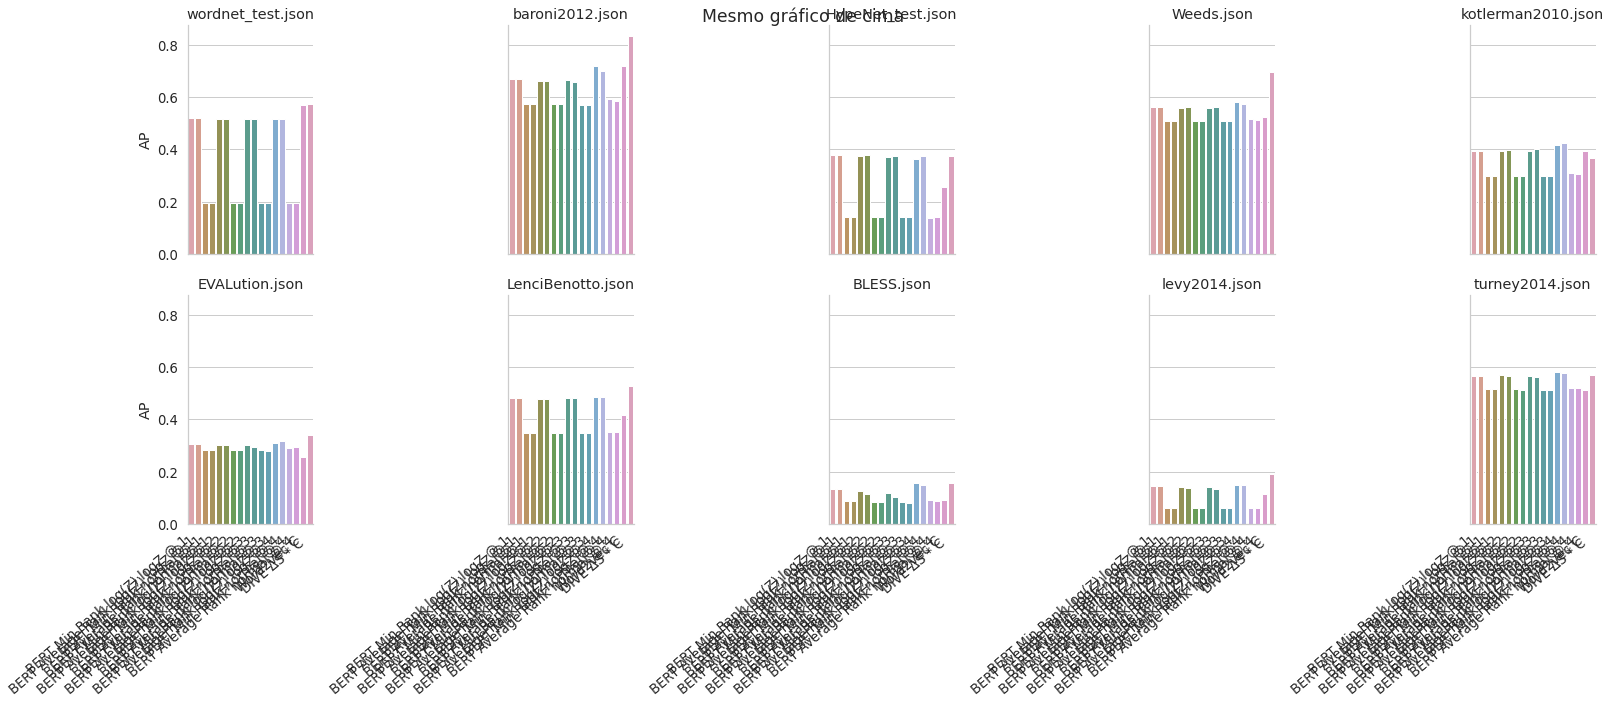

In [17]:
df_dive = nb_utils.get_df_dive()
df_dive['method_format_tipo'] = df_dive['method'].map(nb_utils.get_method_name_ijcai())

#pegar apenas BERT - LogZ e Dive/w2v
# normal == bert
# logZ == bert - logZ
df_dissertacao = df_en.copy()
# df_dissertacao = df_dissertacao[df_dissertacao['tipo'] != 'normal']

# AP por método
df_dissertacao['method_format_tipo'] = df_dissertacao['method_format'].map(nb_utils.get_method_name_ijcai())
df_dissertacao['method_format_tipo'] += " " + df_dissertacao['tipo'] 
df_dissertacao['method_format_tipo'] += " @ " + df_dissertacao['pattern_num'].astype('str')
# print(df_dissertacao['method_format_tipo'])

df_dissertacao = pd.concat([df_dissertacao, df_dive])
df_dissertacao['dataset_format'] = df_dissertacao['dataset'].map(nb_utils.get_dataset_names())
plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset_format' ,hue="method_format_tipo", y="AP", ci="sd",data=df_dissertacao)
ax.set(xlabel="Datasets")
# ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
#              f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)
plt.savefig('fig_ap_datasetsEn_p2.pdf')
plt.show()


plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format_tipo", y="AP", col="dataset", col_wrap=5,
                data=df_dissertacao, saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')
plt.show()

### Test - inglês 10 datasets
#### Stats
 - Dados dos gráficos acima para exportar e vizualizar

In [18]:
# dados dos graficos acima
# salvar CSV e fazer rank medio dos métodos
# print contagem
df_print = df_ratios.groupby(['dataset', 'tipo']).sum()[['true', 'false', 'total']]
df_print['ratio'] = df_print['true'] / df_print['total']
print(df_print)

# df to csv
df_dissertacao['dataset_format'] = df_dissertacao['dataset'].map(nb_utils.get_dataset_names())
group_list = ['dataset_format', 'AP', 'tipo','method_format_tipo', 'N', 'hyper_num', 'pattern_num']
methods_avg_list = ['BERT Min Rank log(Z) logZ @ 1', 'BERT Average Rank log(Z) logZ @ 1',
                   'BERT Min Rank log(Z) logZ @ 4', 'BERT Average Rank log(Z) logZ @ 4',
                    'Word2vec C', 'DIVE ΔS * C ']


df_csv = df_dissertacao[group_list]
df_csv = df_csv.sort_values(by=group_list[:2])
df_avg = df_csv.copy()

df_avg = df_avg[df_avg['method_format_tipo'].isin(methods_avg_list)]
num_datasets = len(df_avg['dataset_format'].unique().tolist())
df_avg['rank_dataset'] = np.arange(1, len(methods_avg_list)+1).tolist() * num_datasets
df_avg.to_csv("rank_medio_ingles_bert_dive_word2vec_4_padroes",index=True)
df_avg = df_avg.groupby('method_format_tipo').mean('rank_dataset')
df_avg.to_csv("rank_medio_ingles_bert_dive_word2vec_4_padroes",index=True)

# print(df_avg[df_avg['method_format_tipo'] == "DIVE ΔS * C "][['method_format_tipo', 'rank_dataset']])

# df_csv['AP'] = df_csv['AP'] * 100
# df_csv['AP'] = df_csv['AP'].round(2)
# table = pd.pivot_table(df_csv, values='AP', index="dataset_format", columns=['method_format_tipo'])
# print(table)
# table.to_csv("datasets_ingles_bert_dive_word2vec_4_padroes",index=True)

                           true  false  total     ratio
dataset            tipo                                
BLESS.json         normal  1337  25195  26532  0.050392
EVALution.json     normal  1911   5196   7107  0.268890
HypeNet_test.json  normal  3512  14158  17670  0.198755
LenciBenotto.json  normal  1933   3077   5010  0.385828
Weeds.json         normal  1119   1114   2233  0.501120
baroni2012.json    normal  1385   1385   2770  0.500000
kotlerman2010.json normal   880   2060   2940  0.299320
levy2014.json      normal   945  11657  12602  0.074988
turney2014.json    normal  1058   1100   2158  0.490269
wordnet_test.json  normal  3994   3996   7990  0.499875


In [19]:
# reset
%reset_selective -f df
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path
%reset_selective -f best
%reset_selective -f max_
%reset_selective -f pattern

_________________________

_________________________

_________________________


# PT-BR
## BERT base neuralmind, cased
### Dataset DEV onto-validation
## Usando wikipedia240M para comparação
 - Sem OOV = 42800 pares
 - com OOV = 94446 pares

In [20]:
vocabs = ["../../vocabs/wikipedia15M/vocab.txt",
          "../../vocabs/wikipedia30M/vocab.txt",
          "../../vocabs/wikipedia60M/vocab.txt",
          "../../vocabs/wikipedia120M/vocab.txt",
          "../../vocabs/wikipedia240M/vocab.txt"]
# data DEV ontoPT
# server
# path_file_bert = "/home/gabrielescobar/hyper_bert/teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-validation.json"
#local
path_file_bert = "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-validation.json"

json_data = json.load(open(path_file_bert))
df_240 = nb_utils.create_dataframe(nb_utils.filter_by_vocab(vocabs[4], json_data), separator=" ")
df_with_oov = nb_utils.create_dataframe(json_data, separator=" ")
pattern_unique = df_with_oov['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]



#server random pairs pt-br
path_file_random = "../../models/neuralmind-bert-base-portuguese-cased_bert_score_2021-02-05_08:55:36/BRrandom.json"
df_random = nb_utils.create_dataframe(json.load(open(path_file_random)), separator="\t")




print(f"DF 240 = {df_240[df_240['pattern'] == pattern_unique[0]].count()['hiponimo']}")
print(f"DF all with OOV = {df_with_oov[df_with_oov['pattern'] == pattern_unique[0]].count()['hiponimo']}")


max_pair_length_240 = df_240[df_240.pattern == pattern_unique[0]]['len_total'].value_counts().max()

# df sem oov e random logz
df_240_random_logz = nb_utils.logsumexp_random_logZ(df_240, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length_240)


# df 240M sem oov
df_240 = nb_utils.logsumexp_normalization(df_240, len_list=len_total_unique, pattern_list=pattern_unique)
print("Processamento completo!")

DF 240 = 42800
DF all with OOV = 94446
Processamento completo!


### DEV Balanceamento do ontoPT-validation SEM OOV
#### Wikipedia 240M sem OOV
 - N = 42800 pares


 ### DEV - ontoPT SEM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Quantidade de pares por comprimento

Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


<Figure size 432x288 with 0 Axes>

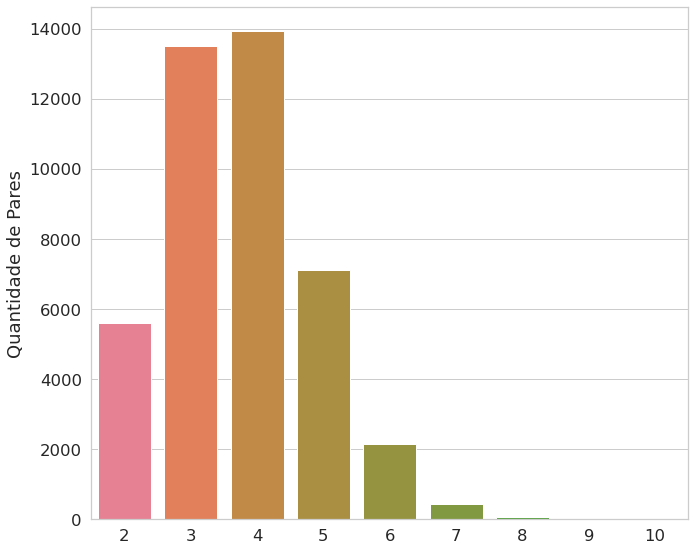

In [21]:
# Balanceamento quantidade de pares por comprimento
# Balanceamento df_with_oov
sns.set(style="whitegrid", font_scale=1.5)
plt.clf()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(10, 8))
df_240_ratio = nb_utils.balanceamento(df_240, patterns=pattern_unique,len_size=len_total_unique)
df_240_ratio['total'] = df_240_ratio['true'] + df_240_ratio['false']
ax = sns.barplot(x="len_total", y="total", data=df_240_ratio, palette=sns.color_palette("husl", 18))
ax.set(xlabel="")
ax.set(ylabel="Quantidade de Pares")

# ax.set_title(f"Number of pairs")
plt.savefig('PT_DEV_numero_de_pares_por_comprimento_dataset_portugues_240M.pdf')

plt.show()


## DEV - ontoPT SEM OOV
### stats
#### Gŕaficos do BERT - log(Z) no DEV português
    - Eixo X: Comprimento do par
    - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
    - Legenda: Número de pares positivo para cada comprimento do par

Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


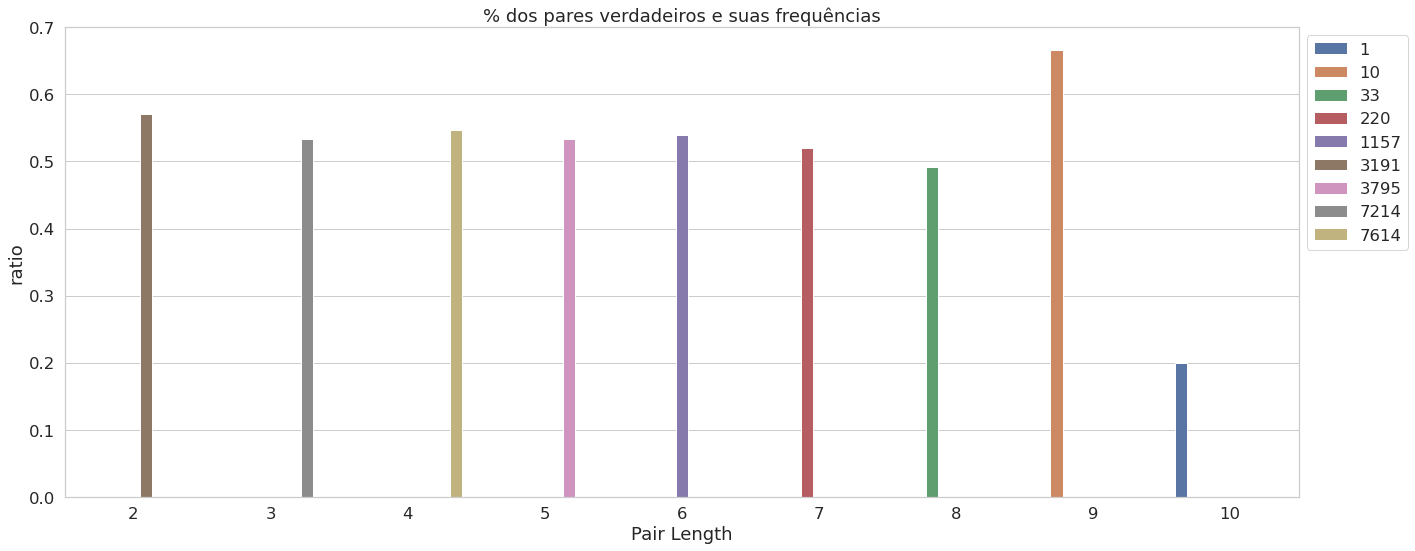

In [22]:
%reset_selective -f json_data

# Balanceamento DEV sem oov
# Porcentagem de pares verdadeiros por comprimento do par
df_240_ratio = nb_utils.balanceamento(df_240, len_size=len_total_unique, patterns=pattern_unique)

plt.figure(figsize=(20, 8))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_240_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

No handles with labels found to put in legend.


Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


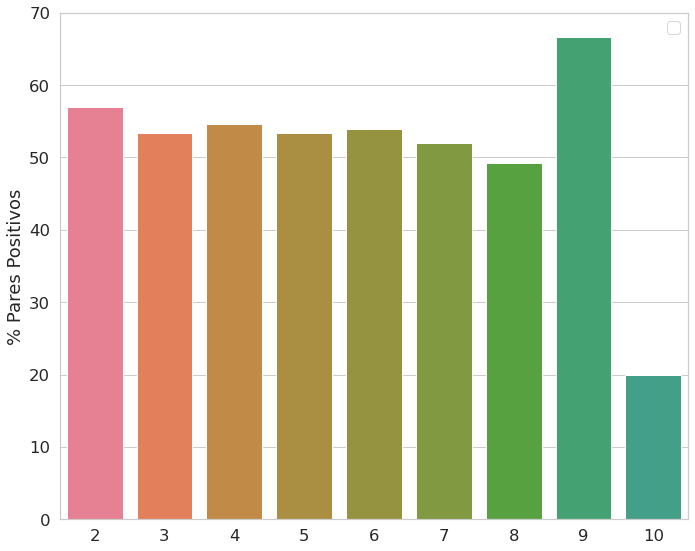

In [23]:
%reset_selective -f json_data

# Balanceamento DEV sem oov - mostrar apenas a porcentagem de pares positivos
# Porcentagem de pares verdadeiros por comprimento do par
df_240_ratio = nb_utils.balanceamento(df_240, len_size=len_total_unique, patterns=pattern_unique)
df_240_ratio['ratio'] = df_240_ratio['ratio'] * 100 
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="len_total", y="ratio", data=df_240_ratio, palette=sns.color_palette("husl", 18))
ax.set(xlabel="")
ax.set(ylabel="% Pares Positivos")

# ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('PT_DEV_240M_porcentangem_pares_positivos_cada_comprimento.pdf')

plt.show()

## DEV - ontoPT SEM OOV
### stats
#### Gŕaficos do BERT - log(Z) no DEV português

#### AP por padrão. Usado para selecionar os melhores padrões
#### Score é BERT - Log(Z)

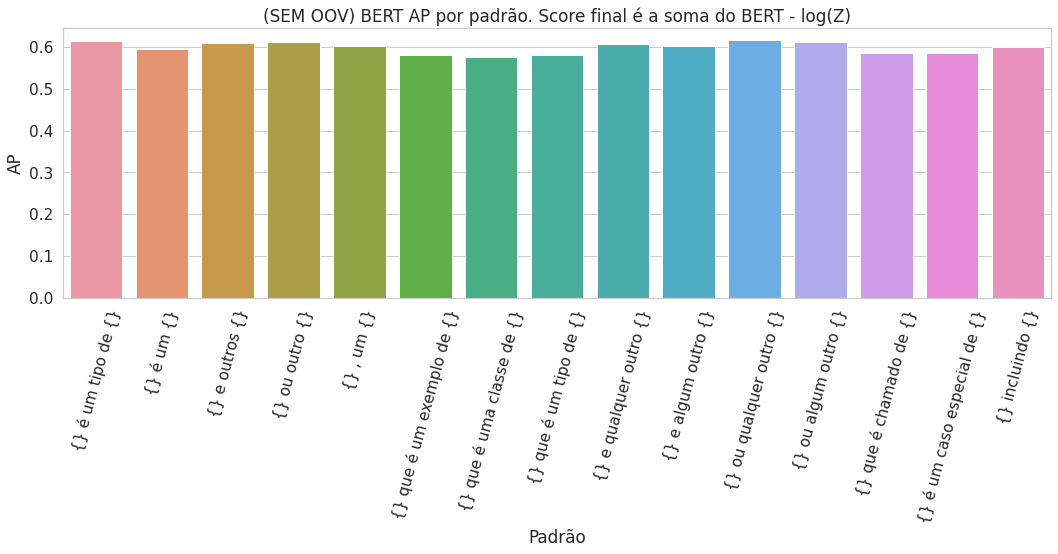

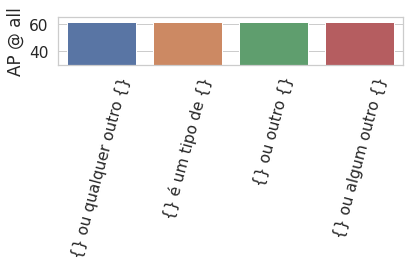

Melhores padrões usando score_final_log(Z)
['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']


In [24]:
# AP DEV ontoPT sem oov
# AP por padrão
# from matplotlib import rcParams
# matplotlib.use('pdf')

# rcParams.update({'figure.autolayout': True})
sns.set(style="whitegrid", font_scale=1.4)


df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_240, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"(SEM OOV) BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()


plt.figure()
df_dissertacao = df_plot.sort_values(by="AP", ascending=False)
df_dissertacao = df_dissertacao.iloc[:4]
df_dissertacao['AP'] = df_dissertacao['AP'] * 100 
ax = sns.barplot(data=df_dissertacao, x='padrao', y='AP')
ax.set(ylim=(30, 65))
ax.set(xlabel="")
ax.set(ylabel="AP @ all")
# ax.set_title(f"BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.savefig('DEV_PT_4_melhores_padroes.pdf')
plt.show()

print(f"Melhores padrões usando score_final_log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)

## DEV - ontoPT SEM OOV
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

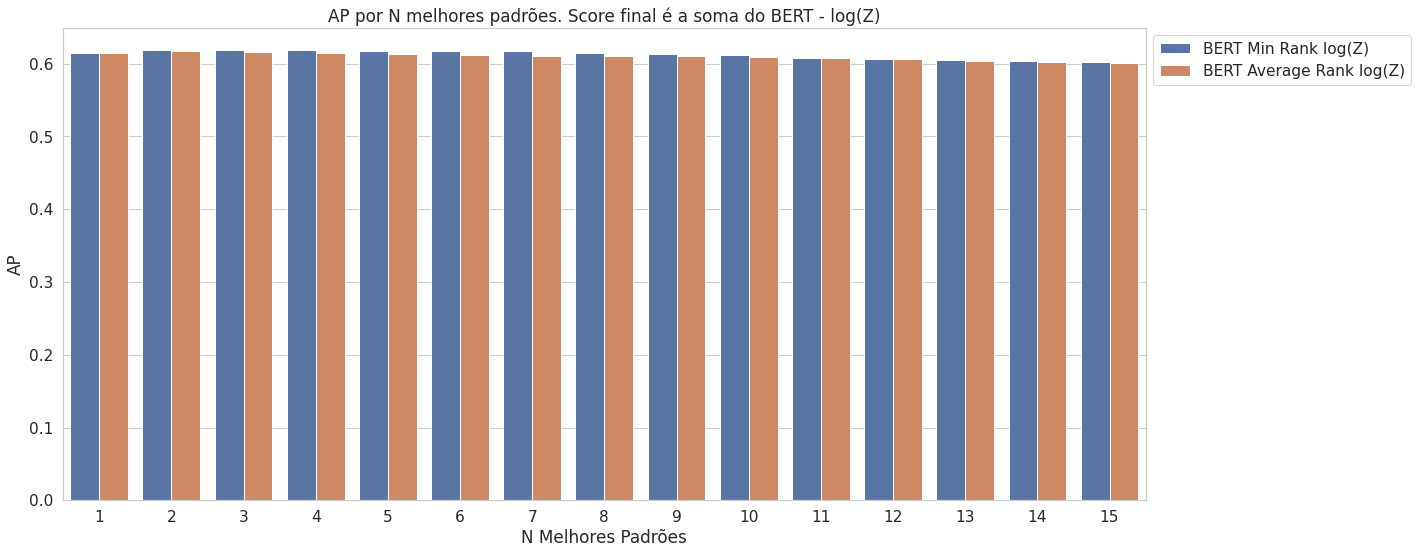

In [25]:
# DEV ontoPT sem oov
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_240, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [26]:
# dados dos gráficos acima
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_240, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.616772  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.615469  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.614867  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.614425  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
4               3  min score_final_log(z)  0.618626  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.618578  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.618106  BERT Min Rank log(Z)
8               5  min score_final_log(z)  0.618013  BERT Min Rank log(Z)
           true         false  total
0  23235.000000  19565.000000  42800
1      0.542874 

## DEV - ontoPT SEM OOV - Random pairs LogZ
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

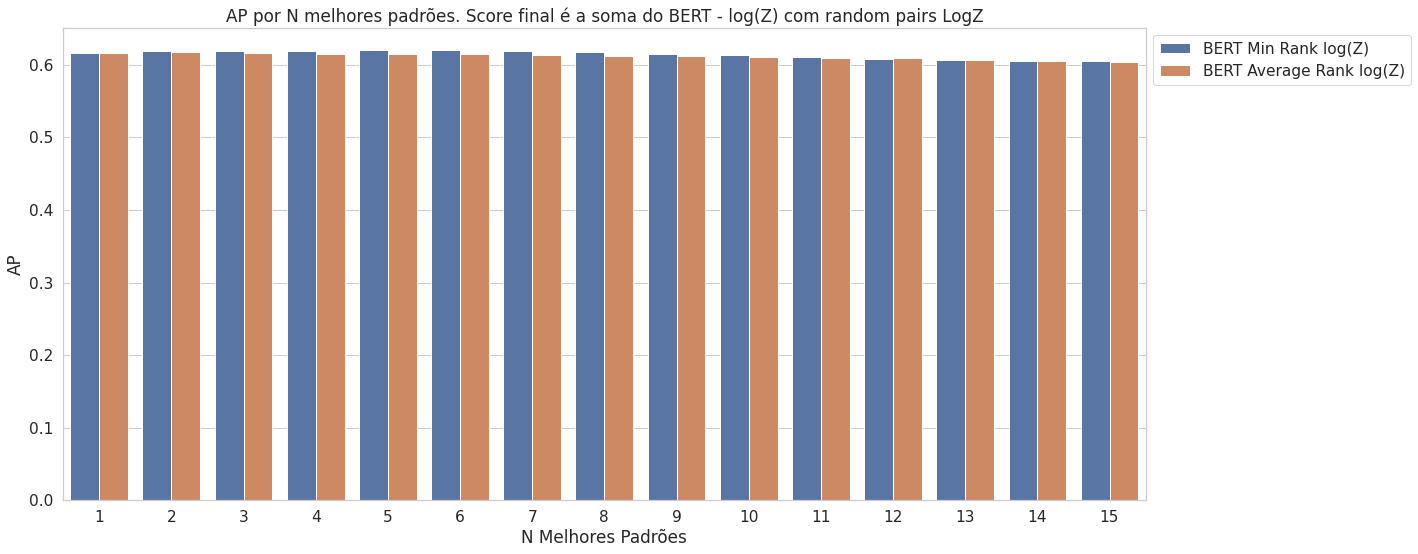

In [27]:
# DEV ontoPT sem oov - random pairs
# AP por n-rank

df_plot = nb_utils.compute_AP_n_best_pattern(df_240_random_logz, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z) com random pairs LogZ")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [28]:
# dados dos gráficos acima
# com random pairs logZ
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_240, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.617657  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.616132  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.616124  BERT Average Rank log(Z)
9               5  mean score_final_log(z)  0.615339  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
    n_best_pattern                  method        AP         method_format
8                5  min score_final_log(z)  0.620180  BERT Min Rank log(Z)
10               6  min score_final_log(z)  0.619850  BERT Min Rank log(Z)
2                2  min score_final_log(z)  0.619506  BERT Min Rank log(Z)
12               7  min score_final_log(z)  0.619282  BERT Min Rank log(Z)
           true         false  total
0  23235.000000  19565.000000  42800
1      0.54

In [29]:
# reset
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path


### DEV Balanceamento do ontoPT-validation COM OOV
#### Wikipedia 240M com OOV
 - N = 94446 pares

### DEV - ontoPT COM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Quantidade de pares por comprimento

In [30]:
# df com oov
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

max_pair_length_with_oov_random = df_with_oov[df_with_oov.pattern == pattern_unique[0]]['len_total'].value_counts().max()

# df_with_oov_random_logz = nb_utils.logsumexp_random_logZ(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique, df_random=df_random, fill_number=max_pair_length_with_oov_random)

df_with_oov = nb_utils.logsumexp_normalization(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique)

Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


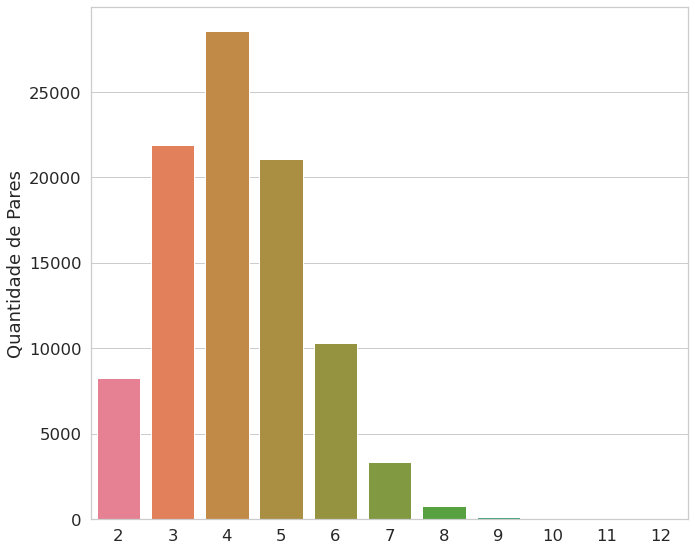

In [31]:
# df com oov
# Balanceamento quantidade de pares por comprimento
# Balanceamento df_with_oov
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(10, 8))
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)
df_with_oov_ratio['total'] = df_with_oov_ratio['true'] + df_with_oov_ratio['false']
ax = sns.barplot(x="len_total", y="total", data=df_with_oov_ratio, palette=sns.color_palette("husl", 18))
ax.set(xlabel="")
ax.set(ylabel="Quantidade de Pares")
# ax.set(xlabel="Pair Length")
# ax.set_title(f"Number of pairs")
plt.savefig('PT_DEV_ALL_quantidade_pares_cada_comprimento.pdf')
plt.show()


## DEV - ontoPT COM OOV
### stats
    - Eixo X: Comprimento do par
    - Eixo Y: Porcentagem de pares verdadeiros para cada comprimento
    - Legenda: Número de pares positivo para cada comprimento do par

No handles with labels found to put in legend.


Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


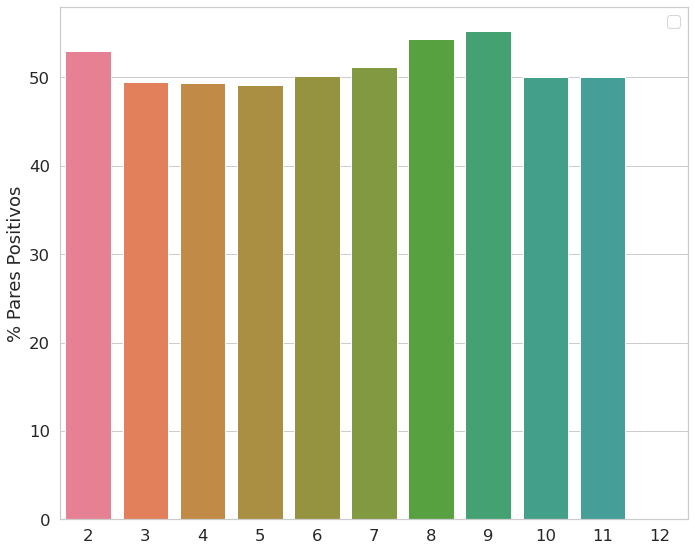

In [32]:
%reset_selective -f json_data

# Balanceamento DEV com oov
# Porcentagem de pares verdadeiros por comprimento do par
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, len_size=len_total_unique, patterns=pattern_unique)
plt.figure(figsize=(10, 8))
df_with_oov_ratio['ratio'] = df_with_oov_ratio['ratio'] * 100
ax = sns.barplot(x="len_total", y="ratio", data=df_with_oov_ratio, palette=sns.color_palette("husl", 18))
ax.set(xlabel="")
ax.set(ylabel="% Pares Positivos")
# ax.set(xlabel="Pair Length")
# ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('PT_DEV_ALL_porcentangem_pares_positivos_cada_comprimento.pdf')
plt.show()

Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


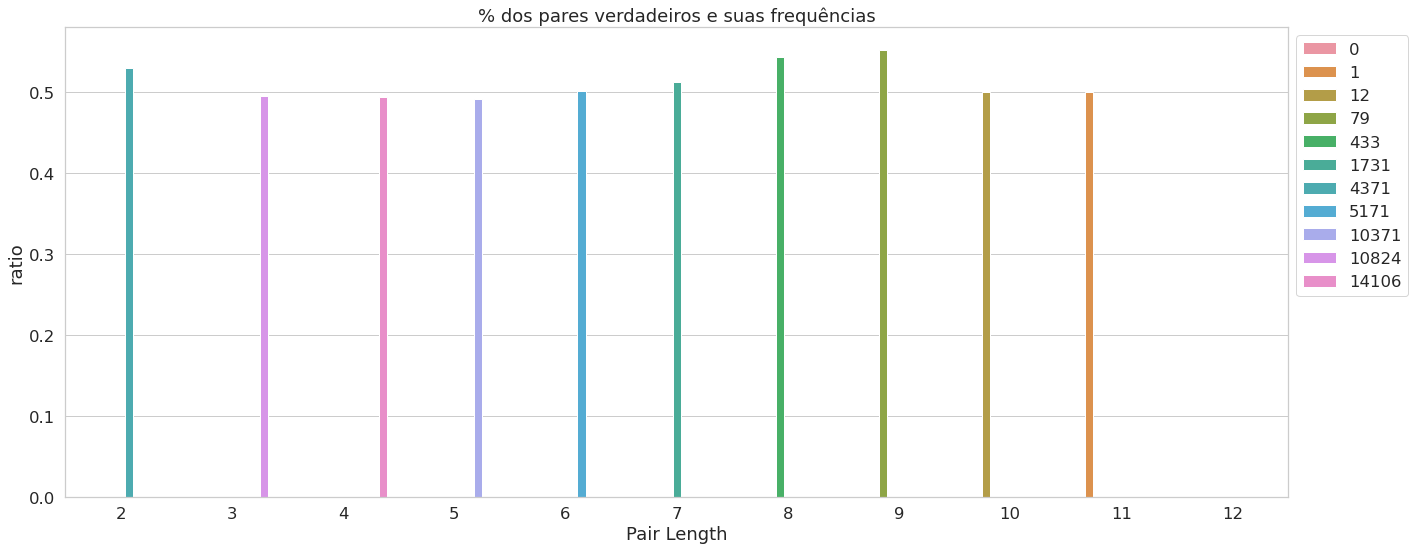

In [33]:
%reset_selective -f json_data

# Balanceamento DEV com oov
# Porcentagem de pares verdadeiros por comprimento do par
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, len_size=len_total_unique, patterns=pattern_unique)

plt.figure(figsize=(20, 8))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_with_oov_ratio)
ax.set(xlabel="Pair Length")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

## DEV - ontoPT COM OOV
### stats
#### Gŕaficos do BERT - log(Z) no DEV português

#### AP por padrão. Usado para selecionar os melhores padrões
#### Score é BERT - Log(Z)

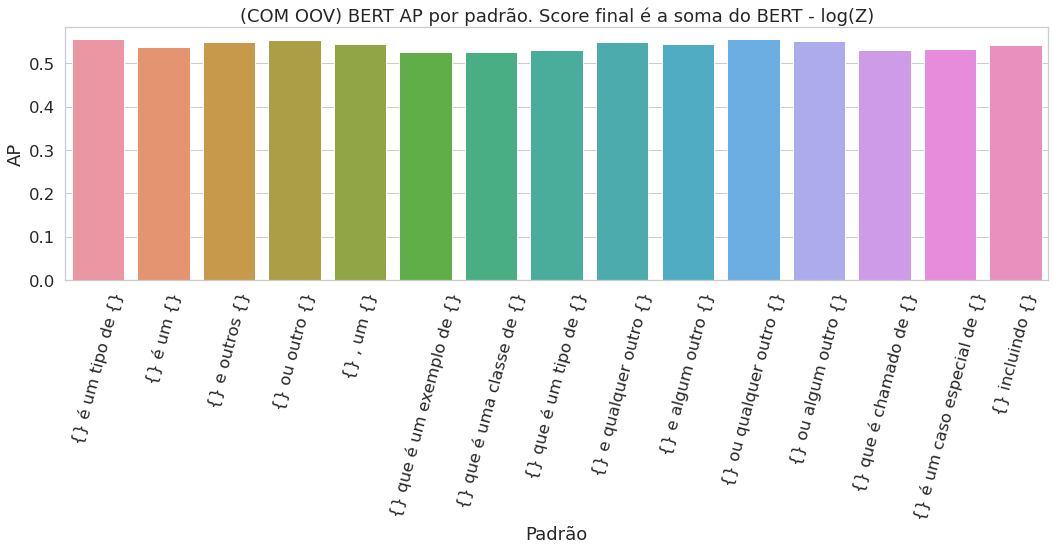

Melhores padrões usando score_final_log(Z)
['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']


In [34]:
# AP DEV ontoPT com oov
# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_with_oov, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"(COM OOV) BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando score_final_log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)

## DEV - ontoPT COM OOV
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

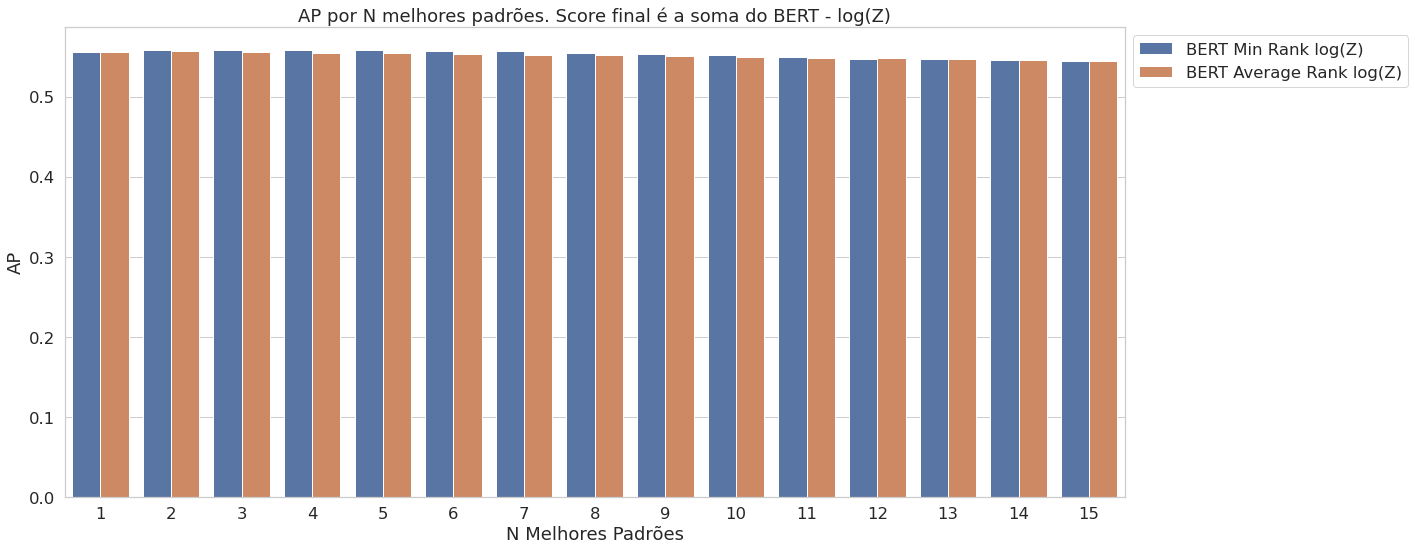

In [35]:
# DEV ontoPT sem oov
# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 _____
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [36]:
# dados dos gráficos acima
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.557288  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.556178  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.555868  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.555246  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
4               3  min score_final_log(z)  0.558960  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.558936  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.558514  BERT Min Rank log(Z)
8               5  min score_final_log(z)  0.558157  BERT Min Rank log(Z)
           true         false  total
0  47099.000000  47347.000000  94446
1      0.498687 

## DEV - ontoPT COM OOV - random pairs LogZ
### stats
#### AP variando os N melhores padrões, usando Average Rank e Min Rank
#### Score é BERT - Log(Z)

In [38]:
# DEV ontoPT sem oov
# AP por n-rank
# df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov_random_logz, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
# df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
# plt.figure(figsize=(20, 8))
# ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
# ax.set(xlabel="N Melhores Padrões")
# ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z) com random pairs")
# ax.legend(bbox_to_anchor=(1, 1))
# plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z)
 _____
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [39]:
# dados dos gráficos acima
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.557288  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.556178  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.555868  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.555246  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
4               3  min score_final_log(z)  0.558960  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.558936  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.558514  BERT Min Rank log(Z)
8               5  min score_final_log(z)  0.558157  BERT Min Rank log(Z)
           true         false  total
0  47099.000000  47347.000000  94446
1      0.498687 

In [40]:
# reset
%reset_selective -f df
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path

-----------------

# Test nos datasets PT-BR


## Test datasets
 - conceptnet-hypernym-1
 - conceptnet-hypernym-all-relation
 - ontoPT-test

In [41]:
# data path server
path_file_bert = ["../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-1.json",
                 "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-allrelation.json",
                 "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-test.json"]

if local:
    # path local
    path_d_w = ["/home/gabrielescobar/Documentos/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_not_oov/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv",
                "/home/gabrielescobar/Documentos/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv"]
else:
    # path server
    path_d_w = ["/home/gabrielescobar/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_not_oov/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv",
            "/home/gabrielescobar/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv"]

df_dive_word2vec = pd.read_csv(path_d_w[0], delimiter="\t")
df_dive_word2vec = df_dive_word2vec[df_dive_word2vec['epoch_num'] == 14]
df_240 = {}
df_with_oov = {}
for path_bert_dataset in path_file_bert:
    dname = path_bert_dataset.split("/")[-1][:-4] + "tsv"
    json_data = json.load(open(path_bert_dataset))
    df_240[dname] = nb_utils.create_dataframe(nb_utils.filter_by_vocab(vocabs[4], json_data), separator=" ")
    df_with_oov[dname] = nb_utils.create_dataframe(json_data, separator=" ")

pattern_unique = df_with_oov[dname]['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df_ratios = []
for dname in df_240.keys():
    print(dname)
    df_now = df_240[dname]
    print(f"DF 240 = {df_now[df_now['pattern'] == pattern_unique[0]].count()['hiponimo']}")
    df_ratio = nb_utils.balanceamento(df_now, len_size=len_total_unique, patterns=pattern_unique)
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = 'sem OOV'
    df_ratios.append(df_ratio)
    df_now = df_with_oov[dname]
    print(f"DF all with OOV = {df_now[df_now['pattern'] == pattern_unique[0]].count()['hiponimo']}")
    df_ratio = nb_utils.balanceamento(df_now, len_size=len_total_unique, patterns=pattern_unique)
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = 'com OOV'
    df_ratios.append(df_ratio)
df_ratios = pd.concat(df_ratios, ignore_index=True)

# df com oov
for dname in df_with_oov.keys():
    df_with_oov[dname] = nb_utils.logsumexp_normalization(df_with_oov[dname], len_list=len_total_unique, pattern_list=pattern_unique)

# df 240M sem oov
for dname in df_240.keys():
    df_240[dname] = nb_utils.logsumexp_normalization(df_240[dname], len_list=len_total_unique, pattern_list=pattern_unique)


conceptnet-hypernym-1.tsv
DF 240 = 2440
Balanceamento: [1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
DF all with OOV = 4646
Balanceamento: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
conceptnet-hypernym-allrelation.tsv
DF 240 = 14330
Balanceamento: [1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
DF all with OOV = 30474
Balanceamento: [1, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
ontoPT-test.tsv
DF 240 = 388927
Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
DF all with OOV = 850006
Balanceamento: [1, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


## Estatística Test datasets PT-BR - SEM OOV

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<Figure size 1080x576 with 0 Axes>

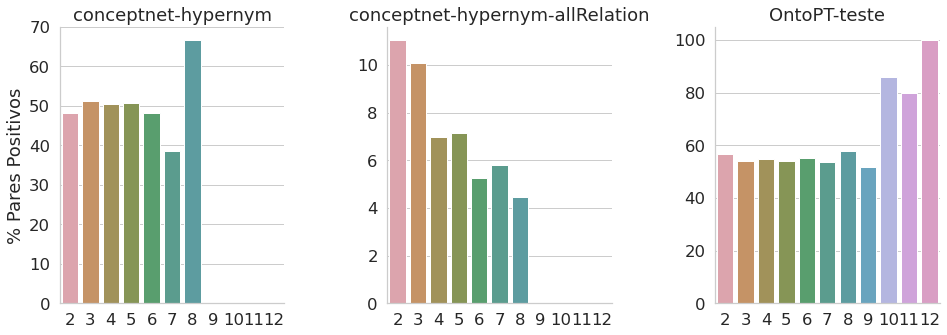

In [42]:
sns.set(style="whitegrid", font_scale=1.5)

df_ratios['dataset_format'] = df_ratios['dataset']
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'sem OOV']

dict_format_name = {"conceptnet-hypernym-1.tsv": "conceptnet-hypernym",
                    "conceptnet-hypernym-allrelation.tsv": "conceptnet-hypernym-allRelation",
                    "ontoPT-test.tsv": "OntoPT-teste"}

df_plot_lensubtoken['dataset_dissertacao'] = df_plot_lensubtoken['dataset_format'].map(dict_format_name)

# Balanceamento true/false por comprimento de par
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(15,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_dissertacao", col_wrap=3,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "% Pares Positivos")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('TESTE_PT_SEM_OOV_240M_porcentagem_pares_positivos_por_comprimento_portugues.pdf')

# _ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')


### Estatística Test - PT-BR 3 datasets SEM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Número de pares para cada comprimento de par
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 1800x576 with 0 Axes>

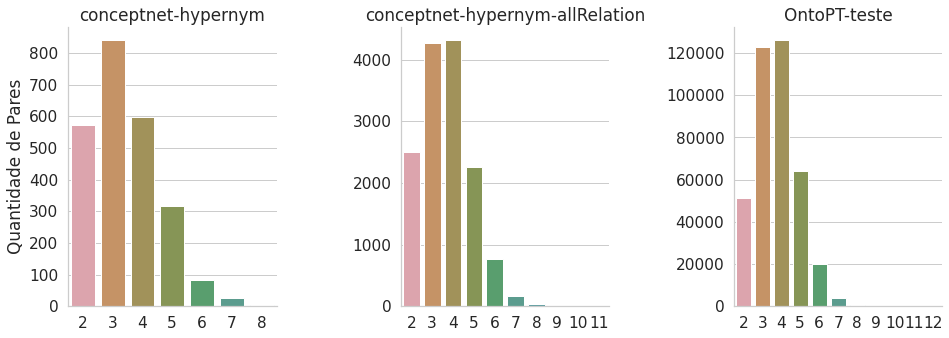

In [43]:
# Balanceamento número de pares por comprimento do par
# Quantidade de pares por tamanho de subtoken
sns.set(style="whitegrid", font_scale=1.4)

plt.figure(figsize=(25,8))
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'sem OOV']
df_plot_lensubtoken['dataset_dissertacao'] = df_plot_lensubtoken['dataset_format'].map(dict_format_name)


g = sns.catplot(x="len_total", y="total", col="dataset_dissertacao", col_wrap=3,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", height=5.0, ci=None, aspect=.9, sharey=False, sharex=False)
(g.set_axis_labels("", "Quantidade de Pares")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('TESTE_PT_SEM_OOV_240M_quantidade_pares_por_comprimento_portugues.pdf')

# _ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

## Estatística Test datasets PT-BR - COM OOV

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<Figure size 1800x576 with 0 Axes>

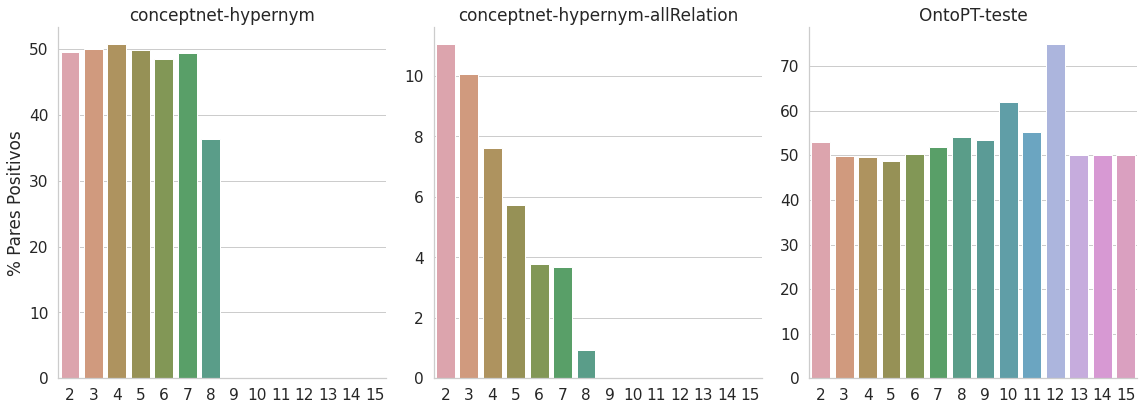

In [44]:
sns.set(style="whitegrid", font_scale=1.4)

df_ratios['dataset_format'] = df_ratios['dataset']
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'com OOV']
df_plot_lensubtoken['dataset_dissertacao'] = df_plot_lensubtoken['dataset_format'].map(dict_format_name)

# Balanceamento true/false por comprimento de par
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(25,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_dissertacao", col_wrap=3,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar",height=6.0, ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "% Pares Positivos")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
# _ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')
plt.savefig('TESTE_PT_ALL_COM_OOV_porcentagem_pares_positivos_por_comprimento_portugues.pdf')
# plt.savefig('num_true_por_subtoken.png', dpi=300)

### Estatística Test - PT-BR 3 datasets COM OOV
#### Stats
 - Eixo X: Comprimento do par
 - Eixo Y: Número de pares para cada comprimento de par
 - OBS: Eixo Y não é compartilhado, para facilitar a visualização

/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/gabrielescobar/miniconda3/envs/hyper_bert/lib/python3.7/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 1440x576 with 0 Axes>

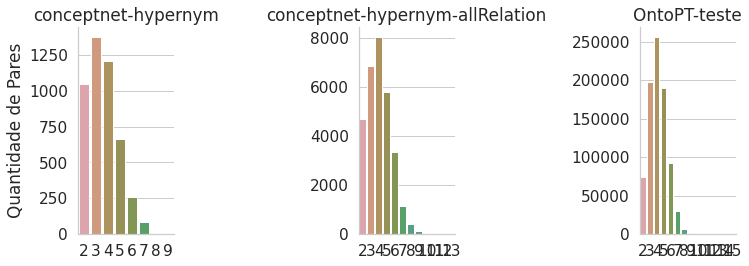

In [45]:
# Balanceamento número de pares por comprimento do par
# Quantidade de pares por tamanho de subtoken
plt.figure(figsize=(20,8))
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'com OOV']
df_plot_lensubtoken['dataset_dissertacao'] = df_plot_lensubtoken['dataset_format'].map(dict_format_name)


g = sns.catplot(x="len_total", y="total", col="dataset_dissertacao", col_wrap=3,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", height=4.0, ci=None, aspect=.9, sharey=False, sharex=False)
(g.set_axis_labels("", "Quantidade de Pares")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.savefig('TESTE_PT_ALL_COM_OOV_quantidade_pares_por_comprimento_portugues.pdf')
plt.show()
# _ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

______________________

## Test SEM OOV
 - Com 2 melhores padrões

In [46]:
# df sem oov
best_pattern_without_oov = ['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']
test= ['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']
assert len(best_pattern_without_oov) == 15
assert test == best_pattern_without_oov


dfs = []
best_pattern_num_train = 4
for count_best_pattern in range(1, best_pattern_num_train + 1):
    for dname in df_240.keys():
        df_temp = nb_utils.compute_min_mean_ap_normal(df_240[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
                                                  best_pattern_num=count_best_pattern)

        df_temp['tipo'] = "log(Z)"
        df_temp['pattern_num'] = count_best_pattern

        dfs.append(df_temp)

        df_temp = nb_utils.compute_ap_bert_soma(df_240[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
                                                best_pattern_num=count_best_pattern, tipo='normal')
        
        df_temp['pattern_num'] = count_best_pattern
        df_temp['tipo'] = "normal"
        dfs.append(df_temp)
df_all = pd.concat(dfs)
df_dissertacao = df_all.copy()
# df_dissertacao = df_dissertacao[df_dissertacao['tipo'] != 'normal']
df_dissertacao['method_format_tipo'] = df_dissertacao['method_format'].map(nb_utils.get_method_name_ijcai())
df_dissertacao['method_format_tipo'] += " " + df_dissertacao['tipo'] 
df_dissertacao['method_format_tipo'] += " @ " + df_dissertacao['pattern_num'].astype('str')

df_dissertacao['method_format'] = df_dissertacao['method'].map(nb_utils.get_method_name_ijcai())
datasetnames_unique = df_dissertacao['dataset'].unique().tolist()
datasetnames_unique_dive_w2v = df_dive_word2vec['dataset'].unique().tolist()
df_dissertacao['dataset_format'] = df_dissertacao['dataset'].map(nb_utils.get_dataset_names())

rename_dataset = {}
for k in datasetnames_unique:
    rename_dataset[k] = os.path.basename(k)
for k in datasetnames_unique_dive_w2v:
    rename_dataset[k] = os.path.basename(k)

df_dive_word2vec['method_format_tipo'] = df_dive_word2vec['method'].map(nb_utils.get_method_name_ijcai())
df_dissertacao = pd.concat([df_dissertacao, df_dive_word2vec])
df_dissertacao['dataset'] = df_dissertacao['dataset'].map(rename_dataset)



#### Test Gŕaficos do BERT log_sum_exp log(Z) em português SEM OOV

 - AP combinando os N melhores padrões (Average rank e Min rank); N=2
 - conceptnet-hypernym-1 N = 2440
  - True = 49.95%; False = 50.05%
 - conceptnet-hypernym-allrelation N = 14330
  - True = 8.5%; False = 91.5 %


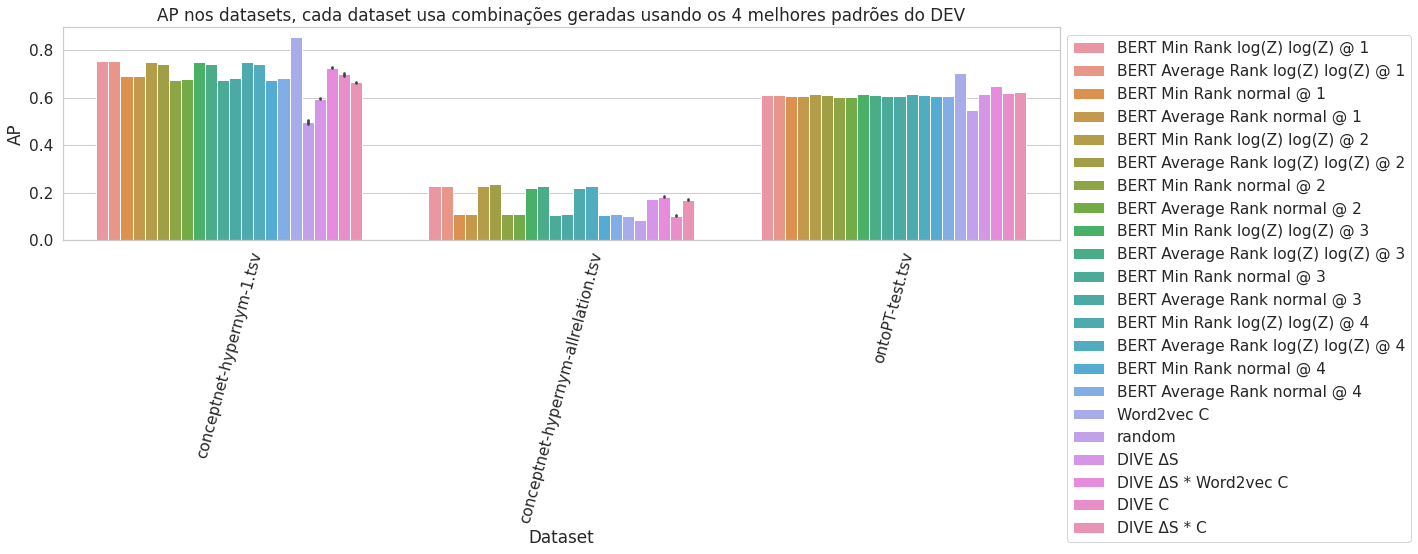

<Figure size 1440x576 with 0 Axes>

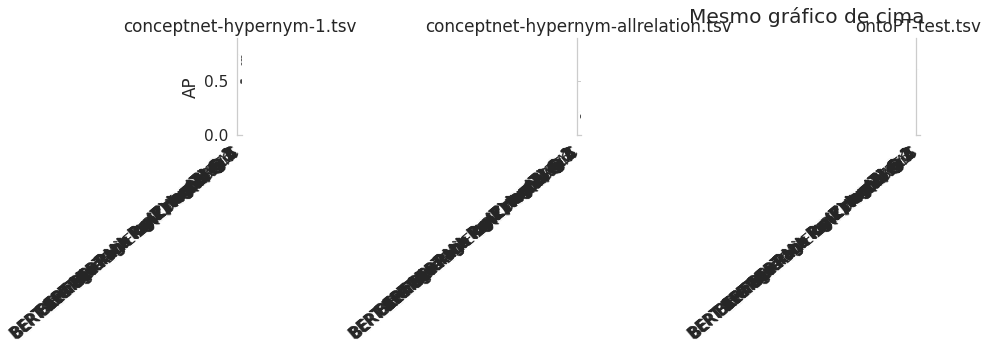

In [47]:
def filter_methods_ijcai(df):
    print(df['method_format'].unique().tolist())
    method_names = ['Word2vec C', 'DIVE \u0394S * C ', 'random',
                    'BERT Average Rank log(Z)', 'BERT Min Rank log(Z)',  ]
    return df[df['method_format'].isin(method_names)]

# df_all = filter_methods_ijcai(df_all)
# df_all['method_format_tipo'] = df_all['method_format'] + df_all['tipo']

#usar df_dissertacao

plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format_tipo", y="AP", ci="sd",data=df_dissertacao)
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)


plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format_tipo", y="AP", col="dataset", col_wrap=5,
                data=df_dissertacao, saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.7, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')

In [49]:
# df to csv
names_dataset_pt = {"conceptnet-hypernym-1.tsv": "conceptnet-hypernym", 
                   "conceptnet-hypernym-allrelation.tsv": "conceptnet-hypernym-allRelations",
                   "ontoPT-test.tsv": "OntoPT-teste"}
df_dissertacao['dataset_format'] = df_dissertacao['dataset'].map(names_dataset_pt)
group_list = ['dataset_format','AP', 'tipo','method_format_tipo', 'N', 'hyper_num', 'pattern_num']

methods_avg_list = ['BERT Min Rank log(Z) log(Z) @ 1', 'BERT Average Rank log(Z) log(Z) @ 1',
                   'BERT Min Rank log(Z) log(Z) @ 4', 'BERT Average Rank log(Z) log(Z) @ 4',
                    'Word2vec C', 'DIVE ΔS * C ']

df_csv = df_dissertacao[group_list]
df_csv = df_csv.sort_values(by=group_list[:2])
# df_avg = df_csv.copy()

# df_avg = df_avg[df_avg['method_format_tipo'].isin(methods_avg_list)]
# num_datasets = len(df_avg['dataset_format'].unique().tolist())
# df_avg['rank_dataset'] = np.arange(1, len(methods_avg_list)+1).tolist() * num_datasets
# df_avg.to_csv("rank_medio_portugues_bert_dive_word2vec_4_padroes",index=True)
# df_avg = df_avg.groupby('method_format_tipo').mean('rank_dataset')
# df_avg.to_csv("rank_medio_portugues_bert_dive_word2vec_4_padroes",index=True)

# print(df_csv)
df_csv['AP'] = df_csv['AP'] * 100
df_csv['AP'] = df_csv['AP'].round(2)
table = pd.pivot_table(df_csv, values='AP', index="dataset_format", columns=['method_format_tipo'])
table.to_csv("datasets_semOOV_portugues_bert_dive_word2vec_4_padroes",index=True)
# print(table)

In [50]:
# balanceamento do dataset inteiro
for dname in df_240.keys():
    df_size = nb_utils.balanceamento_all(df_240[dname], patterns=pattern_unique)
    print(dname)
    print(df_size)


conceptnet-hypernym-1.tsv
         true       false  total
0  1219.00000  1221.00000   2440
1     0.49959     0.50041      1
conceptnet-hypernym-allrelation.tsv
          true         false  total
0  1219.000000  13111.000000  14330
1     0.085066      0.914934      1
ontoPT-test.tsv
            true          false   total
0  212878.000000  176049.000000  388927
1       0.547347       0.452653       1


-----------------------

#### Test Gŕaficos do BERT log_sum_exp log(Z) em português COM OOV
#### Todo os exemplos dos datasets

 - AP combinando os N melhores padrões (Average rank e Min rank); N=2
 - conceptnet-hypernym-1 N = 4646
  - True = 50%; False = 50%
 - conceptnet-hypernym-allrelation N = 30474
  - True = 7.6%; False = 92.4%

In [51]:
# df com oov
# path_d_w [1] == com oov
df_dive_word2vec = pd.read_csv(path_d_w[1], delimiter="\t")
df_dive_word2vec = df_dive_word2vec[df_dive_word2vec['epoch_num'] == 14]
best_pattern_without_oov = ['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']

dfs = []
# best_pattern_num_train = 4
df_temp = {}
# for dname in df_with_oov.keys():
#     df_temp[dname] = nb_utils.compute_min_mean_ap_normal(df_with_oov[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
#                                               best_pattern_num=best_pattern_num_train)

#     dfs.append(df_temp[dname])
# df_all = pd.concat(dfs)
# df_all = pd.concat([df_all, df_dive_word2vec])
# df_all['method_format'] = df_all['method'].map(nb_utils.get_method_name_ijcai())
# datasetnames_unique = df_all['dataset'].unique().tolist()
# rename_dataset = {}
# for k in datasetnames_unique:
#     rename_dataset[k] = os.path.basename(k)

# df_all['dataset'] = df_all['dataset'].map(rename_dataset)

best_pattern_num_train = 4
for count_best_pattern in range(1, best_pattern_num_train + 1):
    for dname in df_with_oov.keys():
        df_temp = nb_utils.compute_min_mean_ap_normal(df_with_oov[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
                                                  best_pattern_num=count_best_pattern)

        df_temp['tipo'] = "log(Z)"
        df_temp['pattern_num'] = count_best_pattern

        dfs.append(df_temp)

        df_temp = nb_utils.compute_ap_bert_soma(df_with_oov[dname], pattern_list=best_pattern_without_oov, dataset_name=dname,
                                                best_pattern_num=count_best_pattern, tipo='normal')
        
        df_temp['pattern_num'] = count_best_pattern
        df_temp['tipo'] = "normal"
        dfs.append(df_temp)
df_all = pd.concat(dfs)
df_dissertacao = df_all.copy()
# df_dissertacao = df_dissertacao[df_dissertacao['tipo'] != 'normal']
df_dissertacao['method_format_tipo'] = df_dissertacao['method_format'].map(nb_utils.get_method_name_ijcai())
df_dissertacao['method_format_tipo'] += " " + df_dissertacao['tipo'] 
df_dissertacao['method_format_tipo'] += " @ " + df_dissertacao['pattern_num'].astype('str')

df_dissertacao['method_format'] = df_dissertacao['method'].map(nb_utils.get_method_name_ijcai())
datasetnames_unique = df_dissertacao['dataset'].unique().tolist()
datasetnames_unique_dive_w2v = df_dive_word2vec['dataset'].unique().tolist()
df_dissertacao['dataset_format'] = df_dissertacao['dataset'].map(nb_utils.get_dataset_names())

rename_dataset = {}
for k in datasetnames_unique:
    rename_dataset[k] = os.path.basename(k)
for k in datasetnames_unique_dive_w2v:
    rename_dataset[k] = os.path.basename(k)

df_dive_word2vec['method_format_tipo'] = df_dive_word2vec['method'].map(nb_utils.get_method_name_ijcai())
df_dissertacao = pd.concat([df_dissertacao, df_dive_word2vec])
df_dissertacao['dataset'] = df_dissertacao['dataset'].map(rename_dataset)

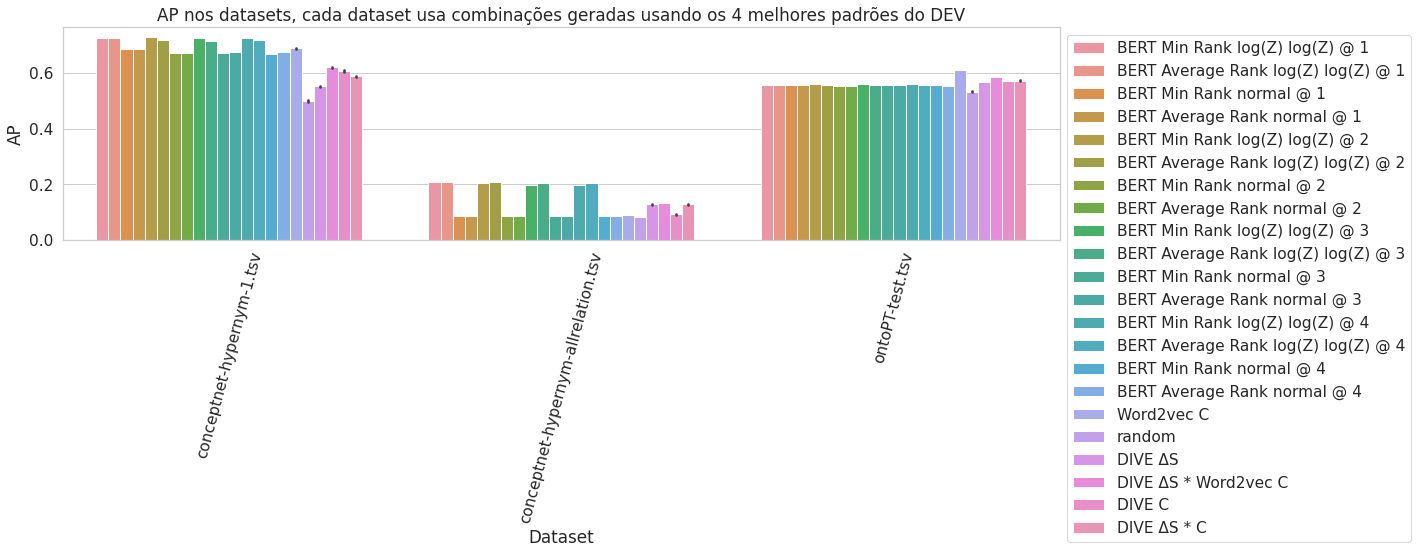

<Figure size 1440x576 with 0 Axes>

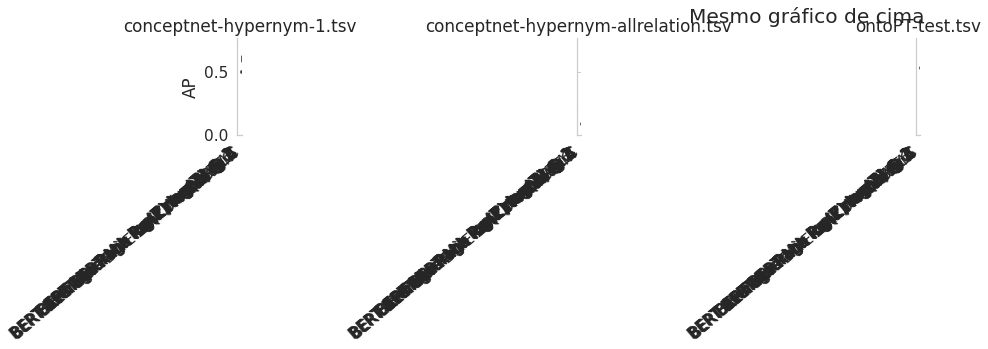

In [52]:
methods_avg_list = ['BERT Min Rank log(Z) log(Z) @ 1', 'BERT Average Rank log(Z) log(Z) @ 1',
                   'BERT Min Rank log(Z) log(Z) @ 4', 'BERT Average Rank log(Z) log(Z) @ 4',
                    'Word2vec C', 'DIVE ΔS * C ']
plt.figure(figsize=(20,8))
# df_dissertacao = df_dissertacao[df_dissertacao['method_format_tipo'].isin(methods_avg_list)]
ax = sns.barplot(x='dataset',hue="method_format_tipo", y="AP", ci="sd",data=df_dissertacao)
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)

plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format_tipo", y="AP", col="dataset", col_wrap=5,
                data=df_dissertacao, saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.6, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')


In [53]:
# df to csv
names_dataset_pt = {"conceptnet-hypernym-1.tsv": "conceptnet-hypernym", 
                   "conceptnet-hypernym-allrelation.tsv": "conceptnet-hypernym-allRelations",
                   "ontoPT-test.tsv": "OntoPT-teste"}
df_dissertacao['dataset_format'] = df_dissertacao['dataset'].map(names_dataset_pt)
group_list = ['dataset_format', 'AP', 'tipo','method_format_tipo', 'N', 'hyper_num', 'pattern_num']

# df to csv
methods_avg_list = ['BERT Min Rank log(Z) log(Z) @ 1', 'BERT Average Rank log(Z) log(Z) @ 1',
                   'BERT Min Rank log(Z) log(Z) @ 4', 'BERT Average Rank log(Z) log(Z) @ 4',
                    'Word2vec C', 'DIVE ΔS * C ']


df_csv = df_dissertacao[group_list]
df_csv = df_csv.sort_values(by=group_list[:2])
df_avg = df_csv.copy()

# df_media = df_avg[df_avg['method_format_tipo'].isin(['Word2vec C', 'DIVE ΔS * C '])]
# df_media = df_media.groupby(['dataset_format', 'method_format_tipo'])
# df_media = df_media.mean(['AP'])

# dict_mean = {}
# dict_mean['dataset_format'] = []
# dict_mean['method_format_tipo'] = []
# dict_mean['AP'] = []


# for dataset_name in names_dataset_pt.values():
#     # Word2vec C
#     dict_mean['dataset_format'].append(dataset_name)
#     dict_mean['method_format_tipo'].append('Word2vec C')
#     ap = df_media[(df_media['dataset_format' == dataset_name]) & (df_media['method_format_tipo' == 'Word2vec C'])]['AP']
#     dict_mean['AP'].append(ap)

    

# print(dict_mean)

# df_avg = df_avg[df_avg['method_format_tipo'].isin(methods_avg_list[:-2])]
# df_t = pd.concat([df_avg, df_media])

# print(df_t)
num_datasets = len(df_avg['dataset_format'].unique().tolist())
# print(df_avg['dataset_format'].unique().tolist())
# print(df_avg['method_format_tipo'].unique().tolist())

# print(df_avg[['dataset_format', 'method_format_tipo', 'AP']])

# df_avg['rank_dataset'] = np.arange(1, len(methods_avg_list)+1).tolist() * num_datasets
# df_avg = df_avg.groupby('method_format_tipo').mean('rank_dataset')
# df_avg.to_csv("rank_medio_portugues_COM_OOV_bert_dive_word2vec_4_padroes",index=True)

# print(df_csv)
df_csv['AP'] = df_csv['AP'] * 100
df_csv['AP'] = df_csv['AP'].round(2)
table = pd.pivot_table(df_csv, values='AP', index="dataset_format", columns=['method_format_tipo'])
# table.to_csv("datasets_comOOV_portugues_bert_dive_word2vec_4_padroes",index=True)
# print(table)

In [54]:
# balanceamento do dataset inteiro
for dname in df_with_oov.keys():
    df_size = nb_utils.balanceamento_all(df_with_oov[dname], patterns=pattern_unique)
    print(dname)
    print(df_size)


conceptnet-hypernym-1.tsv
     true   false  total
0  2323.0  2323.0   4646
1     0.5     0.5      1
conceptnet-hypernym-allrelation.tsv
          true         false  total
0  2323.000000  28151.000000  30474
1     0.076229      0.923771      1
ontoPT-test.tsv
            true          false   total
0  425127.000000  424879.000000  850006
1       0.500146       0.499854       1


In [55]:
# reset
%reset_selective -f df
%reset_selective -f json_
%reset_selective -f ax
%reset_selective -f path
%reset_selective -f g
%reset_selective -f legend